In [46]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)

# print out the model's structure
print(model)

# set the model to evaluation mode
model.eval()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

img = plt.imread("HEAAN/run/luis.png")

img = transform(img)

img = img.unsqueeze(0)

print(img.shape)

CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

Using cache found in /Users/aws/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


In [3]:
def precision(correct, approx):
    absolute = np.sum(np.abs(correct - approx)) / len(correct)
    relative = absolute / (np.sum(np.abs(correct)) / len(correct))
    return 1 - relative

In [86]:
def plot_error(actual, approx, bound=(-1.5, 1.5)):
    plt.plot(actual, linewidth=0.5)
    plt.plot(approx, linewidth=0.5)
    plt.gcf().set_size_inches(1.5 * plt.gcf().get_size_inches()[0], plt.gcf().get_size_inches()[1])
    err = approx - actual
    
    plt.figure()
    plt.hist(err, bins=50)
    plt.xlim(bound)
    plt.title("Distribution of Error")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

(3072,) (3072,)
0.8710338829918954


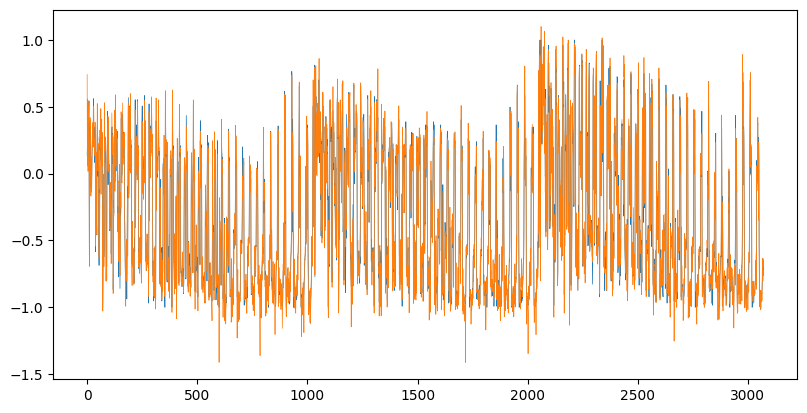

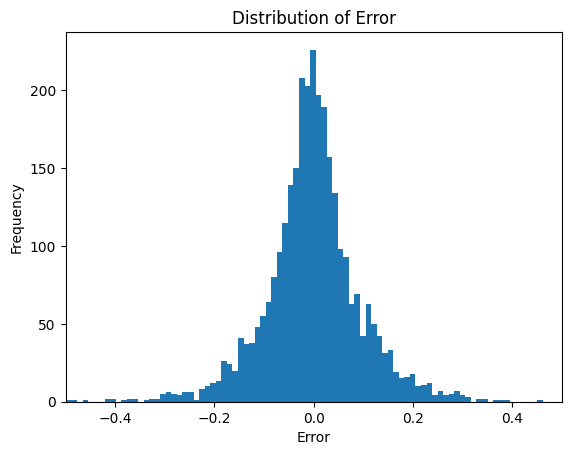

In [7]:
img_he = np.loadtxt("data/img.txt").reshape(-1)   
img0 = img.numpy().reshape(-1)

print(img_he.shape, img0.shape)
print(precision(img0, img_he))
plot_error(img0, img_he, (-0.5, 0.5))

[-0.04579  0.04291  0.2548  ...  0.1205   0.04418  0.03081]
(16384,) (16384,)
0.4843055065131955


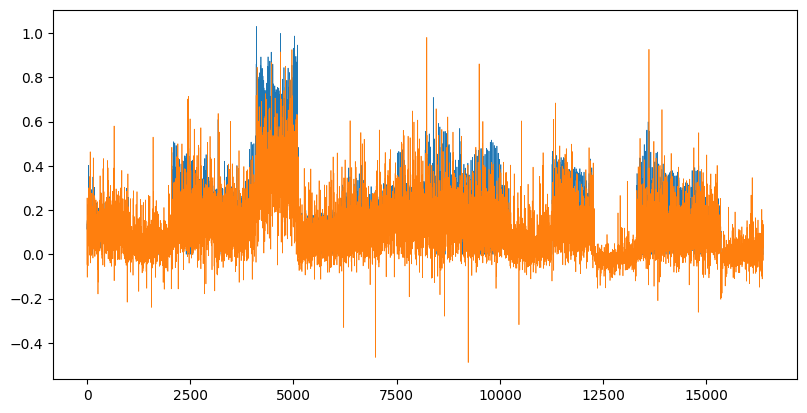

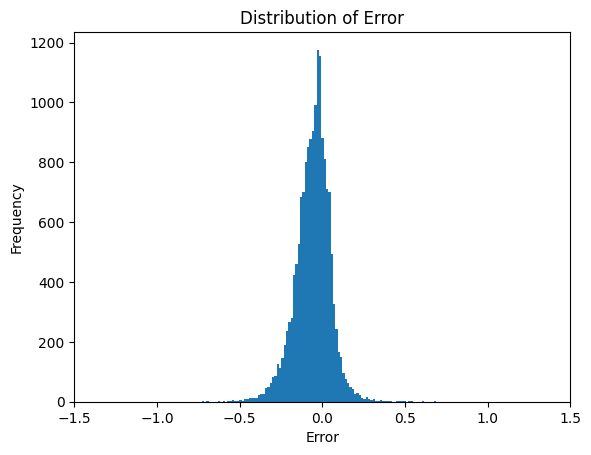

In [6]:
l0_he = np.loadtxt("data/Layer0.txt").reshape(-1)
l0 = model.relu(model.bn1(model.conv1(img))).reshape(-1).detach().numpy()

print(l0_he)    
# weight = model.bn1.weight.detach().numpy()
# bias = model.bn1.bias.detach().numpy()
# mean = model.bn1.running_mean.detach().numpy()
# var = model.bn1.running_var.detach().numpy()
# print(weight, bias, mean, var)

print(l0_he.shape, l0.shape)
print(precision(l0, l0_he))
plot_error(l0, l0_he)


(16384,) (16384,)
0.351274880350508


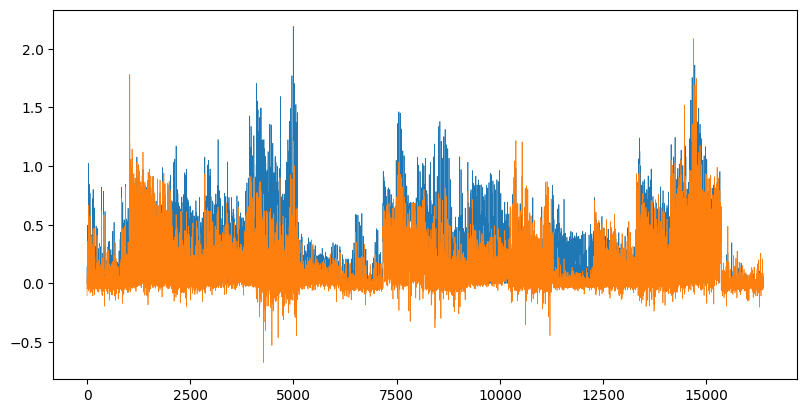

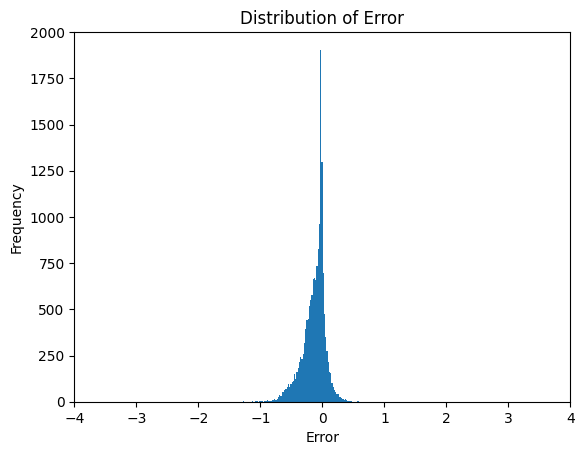

In [6]:
l1_he = np.loadtxt("data/Layer1.1.txt").reshape(-1)
l1 = (model.layer1[0](model.relu(model.bn1(model.conv1(img))))).reshape(-1).detach().numpy()

print(l1_he.shape, l1.shape)
print(precision(l1, l1_he))
plot_error(l1, l1_he, (-4, 4))


(16384,) (16384,)
0.09586897717849452


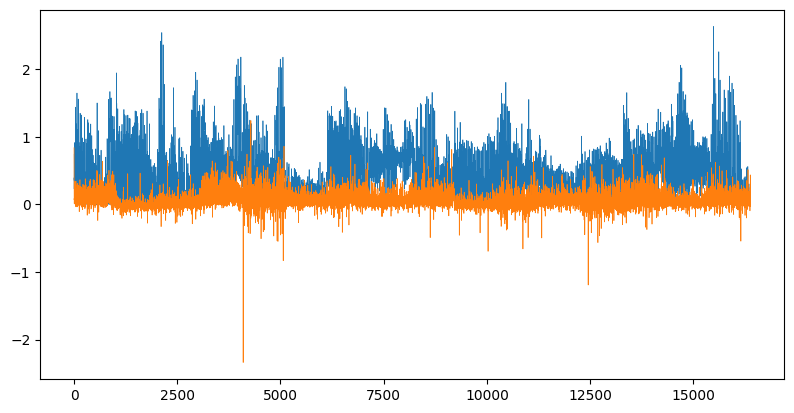

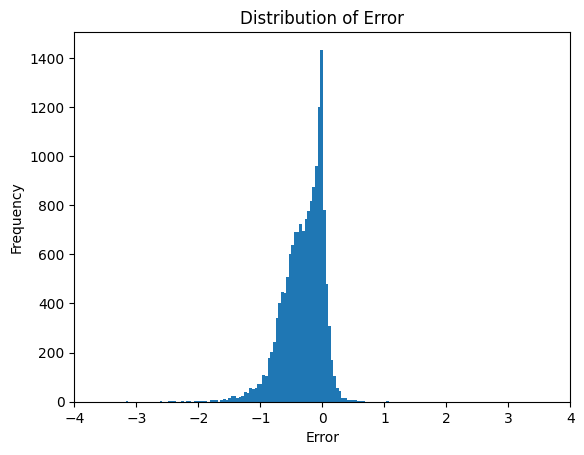

In [9]:
l1_he = np.loadtxt("data/Layer1.txt").reshape(-1)
# l1_he = np.where(l1_he < -2, -2, l1_he)
l1 = model.layer1(model.relu(model.bn1(model.conv1(img)))).reshape(-1).detach().numpy()

print(l1_he.shape, l1.shape)
print(precision(l1, l1_he))
plot_error(l1, l1_he, (-4, 4))


(8192,) (8192,)
-3.303518607629603e+19


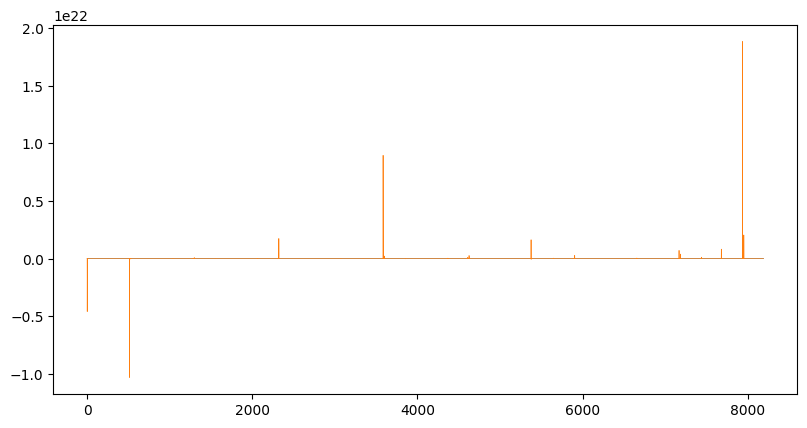

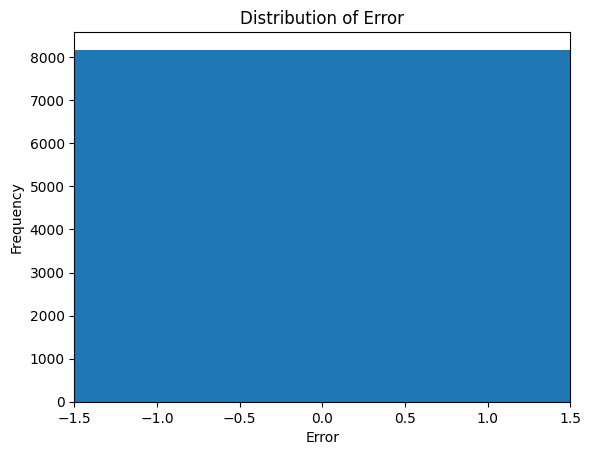

In [13]:
l2_he = np.loadtxt("data/Layer2.txt").reshape(-1)
l2 = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img))))).reshape(-1).detach().numpy()

print(l2_he.shape, l2.shape)
print(precision(l2, l2_he))
plot_error(l2, l2_he)

(4096,) (4096,)
-2554.830695390307


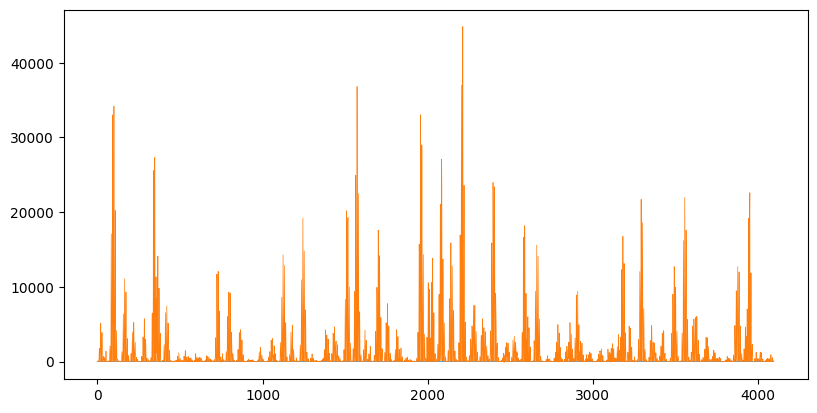

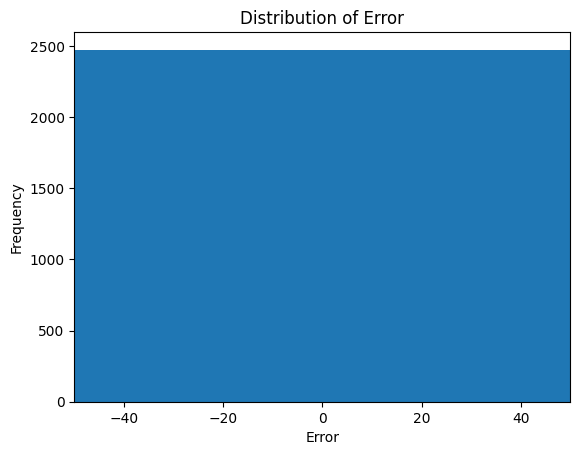

In [41]:
l3_he = np.loadtxt("data/Layer3.txt").reshape(-1)
l3 = model.layer3(model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img)))))).reshape(-1).detach().numpy()

print(l3_he.shape, l3.shape)
print(precision(l3, l3_he))
plot_error(l3, l3_he, (-50, 50))

In [30]:
import pandas as pd

def format_ndarray_csv(arr1, arr2, arr3, precision=3):
    data = {'a': range(len(arr1)), 'b': np.round(arr1, precision), 'c': np.round(arr2, precision), 'd': np.round(arr3, precision)}
    df = pd.DataFrame(data)
    df.to_csv('./temp.csv', index=False)

0.999908141677187
0.7656685055453053


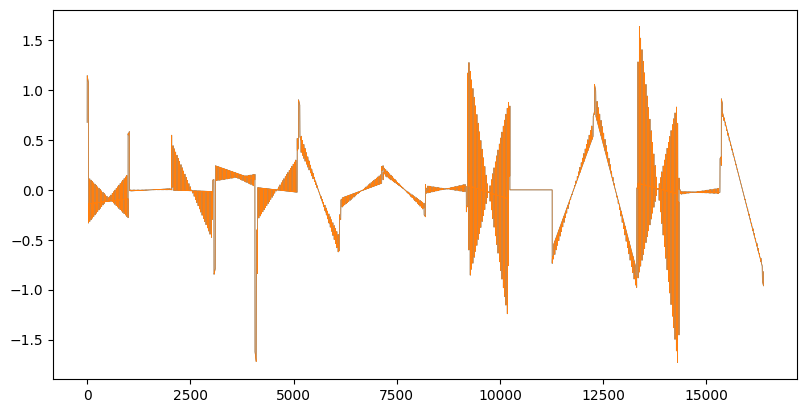

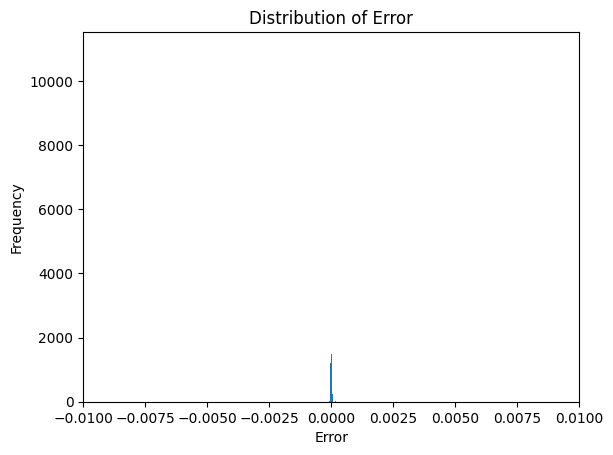

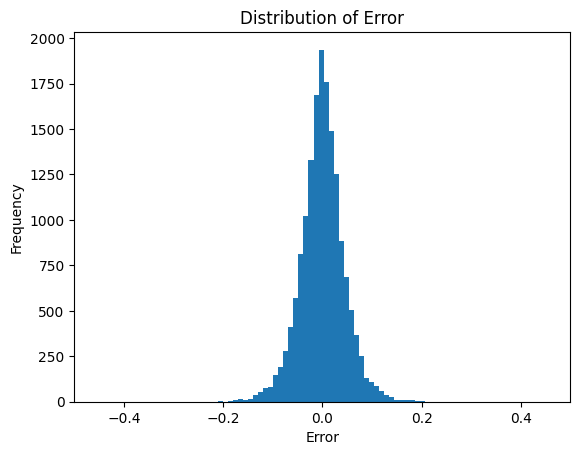

(-0.00100, 0) (-0.00096, 0) (-0.00092, 0) (-0.00088, 0) (-0.00084, 0) (-0.00080, 0) (-0.00076, 0) (-0.00072, 0) (-0.00068, 0) (-0.00064, 0) (-0.00060, 0) (-0.00056, 0) (-0.00052, 1) (-0.00048, 5) (-0.00044, 3) (-0.00040, 3) (-0.00036, 19) (-0.00032, 7) (-0.00028, 1) (-0.00024, 4) (-0.00020, 6) (-0.00016, 2) (-0.00012, 3) (-0.00008, 626) (-0.00004, 7516) (0.00000, 7559) (0.00004, 582) (0.00008, 2) (0.00012, 5) (0.00016, 14) (0.00020, 3) (0.00024, 3) (0.00028, 3) (0.00032, 3) (0.00036, 4) (0.00040, 4) (0.00044, 4) (0.00048, 2) (0.00052, 0) (0.00056, 0) (0.00060, 0) (0.00064, 0) (0.00068, 0) (0.00072, 0) (0.00076, 0) (0.00080, 0) (0.00084, 0) (0.00088, 0) (0.00092, 0) (0.00096, 0) 
(-0.25, 0) (-0.24, 0) (-0.23, 0) (-0.22, 1) (-0.21, 4) (-0.20, 1) (-0.19, 6) (-0.18, 9) (-0.17, 15) (-0.16, 8) (-0.15, 17) (-0.14, 36) (-0.13, 55) (-0.12, 73) (-0.11, 76) (-0.10, 142) (-0.09, 189) (-0.08, 260) (-0.07, 371) (-0.06, 543) (-0.05, 780) (-0.04, 950) (-0.03, 1260) (-0.02, 1587) (-0.01, 1827) (0.00, 1

In [101]:
conv_he = np.loadtxt("data/conv2d.txt").reshape(-1)

conv_he_ = np.loadtxt("data/conv2d_.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(3).reshape(1, 3, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

print(precision(conv_o, conv_he_))

format_ndarray_csv(conv_o[::64], conv_he[::64], conv_he_[::64])

plot_error(conv_o, conv_he, (-0.01, 0.01))

plt.figure()
plt.hist(conv_he_ - conv_o, bins=50)
plt.xlim((-0.5, 0.5))
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

hist, bins = np.histogram(conv_he - conv_o, bins=np.linspace(-0.001, 0.001, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.5f}, {hist[i]})", end=" ")

print()

hist, bins = np.histogram(conv_he_ - conv_o, bins=np.linspace(-0.25, 0.25, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.2f}, {hist[i]})", end=" ")


0.9998922713745587
0.9310681562868421


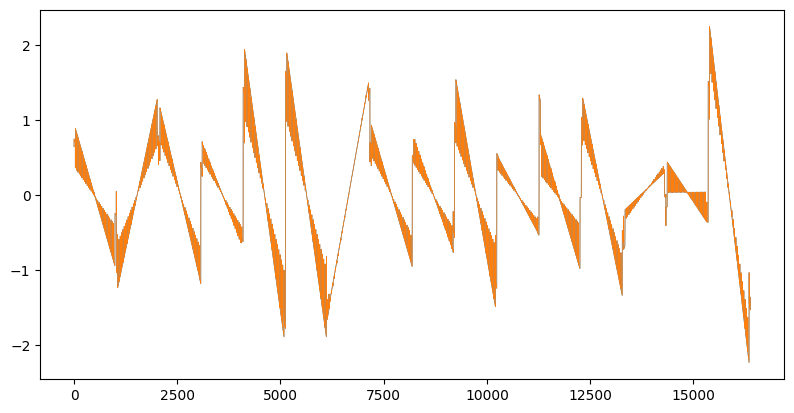

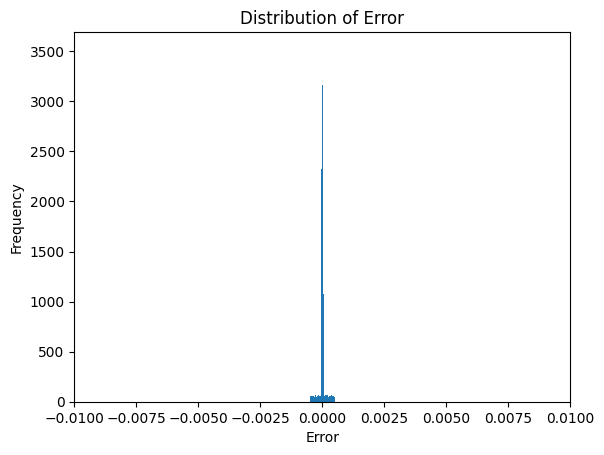

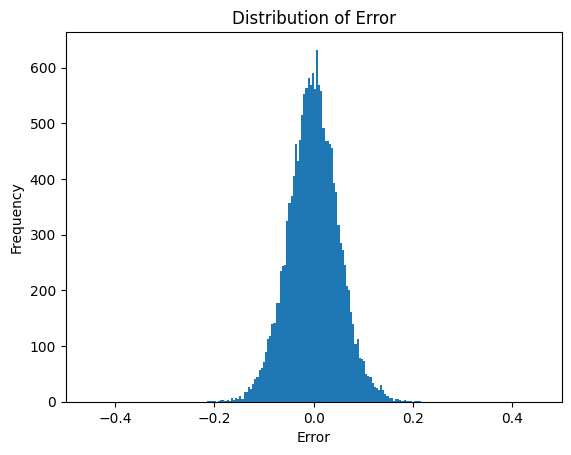

(-0.00100, 0) (-0.00096, 0) (-0.00092, 0) (-0.00088, 0) (-0.00084, 0) (-0.00080, 0) (-0.00076, 0) (-0.00072, 0) (-0.00068, 0) (-0.00064, 0) (-0.00060, 0) (-0.00056, 0) (-0.00052, 51) (-0.00048, 114) (-0.00044, 111) (-0.00040, 121) (-0.00036, 113) (-0.00032, 103) (-0.00028, 119) (-0.00024, 106) (-0.00020, 107) (-0.00016, 117) (-0.00012, 117) (-0.00008, 1326) (-0.00004, 5625) (0.00000, 5725) (0.00004, 1276) (0.00008, 130) (0.00012, 132) (0.00016, 125) (0.00020, 114) (0.00024, 114) (0.00028, 108) (0.00032, 117) (0.00036, 121) (0.00040, 108) (0.00044, 122) (0.00048, 62) (0.00052, 0) (0.00056, 0) (0.00060, 0) (0.00064, 0) (0.00068, 0) (0.00072, 0) (0.00076, 0) (0.00080, 0) (0.00084, 0) (0.00088, 0) (0.00092, 0) (0.00096, 0) 
(-0.25, 0) (-0.24, 0) (-0.23, 0) (-0.22, 1) (-0.21, 2) (-0.20, 3) (-0.19, 7) (-0.18, 4) (-0.17, 8) (-0.16, 12) (-0.15, 22) (-0.14, 41) (-0.13, 69) (-0.12, 98) (-0.11, 152) (-0.10, 215) (-0.09, 305) (-0.08, 387) (-0.07, 529) (-0.06, 683) (-0.05, 860) (-0.04, 1017) (-0.03

In [105]:
conv_he = np.loadtxt("data/conv2dfast1.txt").reshape(-1)

conv_he_ = np.loadtxt("data/conv2dfast1_.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.layer1[0].conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

print(precision(conv_o, conv_he_))

format_ndarray_csv(conv_o[::64], conv_he[::64], conv_he_[::64])

plot_error(conv_o, conv_he, (-0.01, 0.01))

plt.figure()
plt.hist(conv_he_ - conv_o, bins=100)
plt.xlim((-0.5, 0.5))
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

hist, bins = np.histogram(conv_he - conv_o, bins=np.linspace(-0.001, 0.001, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.5f}, {hist[i]})", end=" ")

print()

hist, bins = np.histogram(conv_he_ - conv_o, bins=np.linspace(-0.25, 0.25, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.2f}, {hist[i]})", end=" ")

0.9998858207367505
0.949586438339816


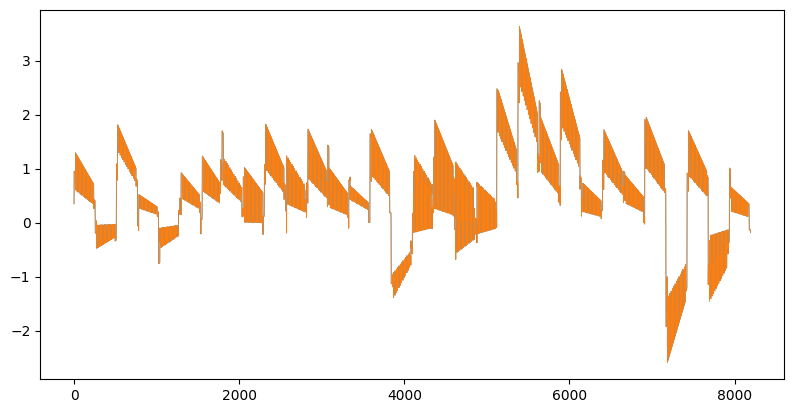

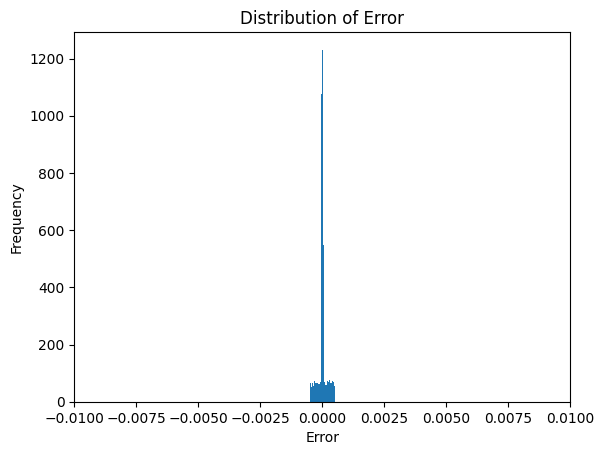

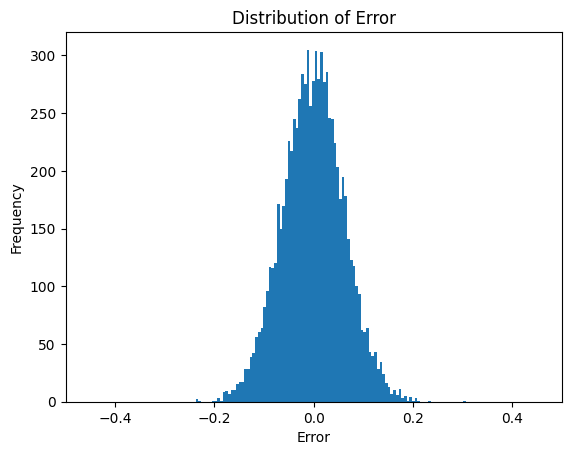

(-0.00100, 0) (-0.00096, 0) (-0.00092, 0) (-0.00088, 0) (-0.00084, 0) (-0.00080, 0) (-0.00076, 0) (-0.00072, 0) (-0.00068, 0) (-0.00064, 0) (-0.00060, 0) (-0.00056, 0) (-0.00052, 64) (-0.00048, 118) (-0.00044, 124) (-0.00040, 122) (-0.00036, 128) (-0.00032, 131) (-0.00028, 131) (-0.00024, 139) (-0.00020, 136) (-0.00016, 134) (-0.00012, 143) (-0.00008, 541) (-0.00004, 2181) (0.00000, 2179) (0.00004, 573) (0.00008, 137) (0.00012, 139) (0.00016, 129) (0.00020, 137) (0.00024, 126) (0.00028, 130) (0.00032, 110) (0.00036, 123) (0.00040, 131) (0.00044, 124) (0.00048, 62) (0.00052, 0) (0.00056, 0) (0.00060, 0) (0.00064, 0) (0.00068, 0) (0.00072, 0) (0.00076, 0) (0.00080, 0) (0.00084, 0) (0.00088, 0) (0.00092, 0) (0.00096, 0) 
(-0.25, 0) (-0.24, 2) (-0.23, 1) (-0.22, 0) (-0.21, 1) (-0.20, 2) (-0.19, 6) (-0.18, 18) (-0.17, 13) (-0.16, 26) (-0.15, 33) (-0.14, 49) (-0.13, 73) (-0.12, 94) (-0.11, 131) (-0.10, 164) (-0.09, 211) (-0.08, 260) (-0.07, 286) (-0.06, 360) (-0.05, 418) (-0.04, 443) (-0.03,

In [102]:
conv_he = np.loadtxt("data/conv2dfast2.txt").reshape(-1)

conv_he_ = np.loadtxt("data/conv2dfast2_.txt").reshape(-1)

input_tensor = torch.arange(256, dtype=torch.float32).repeat(32).reshape(1, 32, 16, 16)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.layer2[1].conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

print(precision(conv_o, conv_he_))

format_ndarray_csv(conv_o[::32], conv_he[::32], conv_he_[::32])

plot_error(conv_o, conv_he, (-0.01, 0.01))

plt.figure()
plt.hist(conv_he_ - conv_o, bins=100)
plt.xlim((-0.5, 0.5))
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

hist, bins = np.histogram(conv_he - conv_o, bins=np.linspace(-0.001, 0.001, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.5f}, {hist[i]})", end=" ")

print()

hist, bins = np.histogram(conv_he_ - conv_o, bins=np.linspace(-0.25, 0.25, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.2f}, {hist[i]})", end=" ")

0.9998918347139084
0.9518049185879561


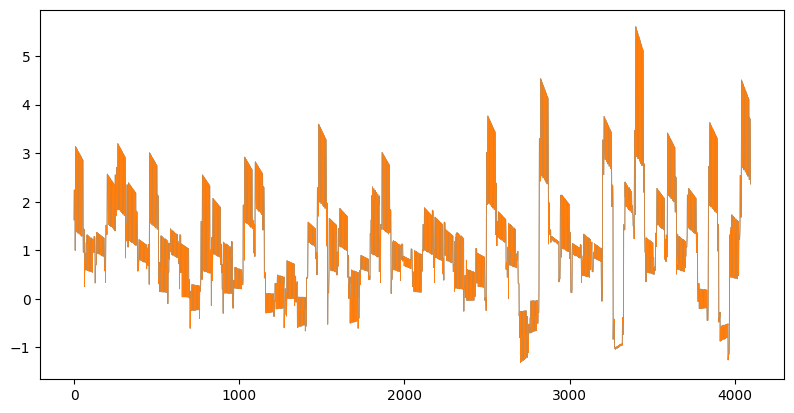

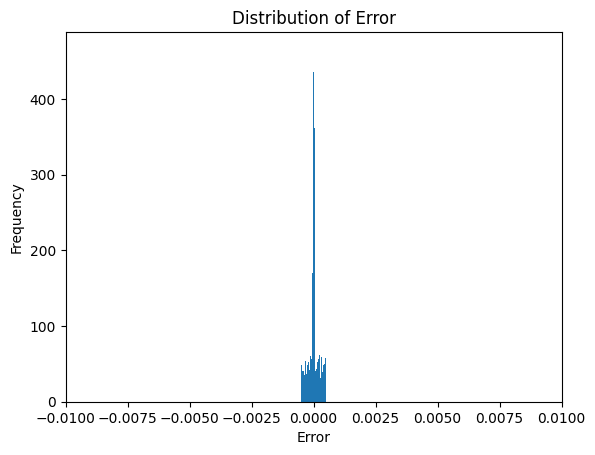

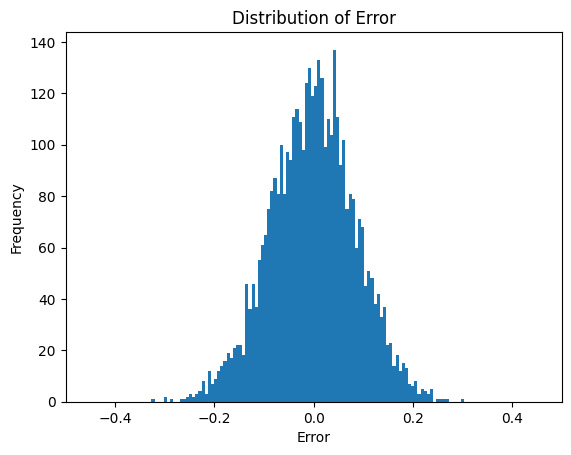

(-0.00200, 0) (-0.00192, 0) (-0.00184, 0) (-0.00176, 0) (-0.00168, 0) (-0.00160, 0) (-0.00152, 0) (-0.00144, 0) (-0.00136, 0) (-0.00128, 0) (-0.00120, 0) (-0.00112, 0) (-0.00104, 0) (-0.00096, 0) (-0.00088, 0) (-0.00080, 0) (-0.00072, 0) (-0.00064, 0) (-0.00056, 45) (-0.00048, 175) (-0.00040, 173) (-0.00032, 185) (-0.00024, 193) (-0.00016, 200) (-0.00008, 1097) (0.00000, 1021) (0.00008, 185) (0.00016, 206) (0.00024, 186) (0.00032, 167) (0.00040, 216) (0.00048, 47) (0.00056, 0) (0.00064, 0) (0.00072, 0) (0.00080, 0) (0.00088, 0) (0.00096, 0) (0.00104, 0) (0.00112, 0) (0.00120, 0) (0.00128, 0) (0.00136, 0) (0.00144, 0) (0.00152, 0) (0.00160, 0) (0.00168, 0) (0.00176, 0) (0.00184, 0) (0.00192, 0) 
(-0.25, 4) (-0.24, 6) (-0.23, 10) (-0.22, 10) (-0.21, 12) (-0.20, 15) (-0.19, 22) (-0.18, 27) (-0.17, 30) (-0.16, 36) (-0.15, 34) (-0.14, 61) (-0.13, 61) (-0.12, 74) (-0.11, 91) (-0.10, 104) (-0.09, 127) (-0.08, 140) (-0.07, 140) (-0.06, 149) (-0.05, 155) (-0.04, 185) (-0.03, 172) (-0.02, 176) (

In [104]:
conv_he = np.loadtxt("data/conv2dfast3.txt").reshape(-1)

conv_he_ = np.loadtxt("data/conv2dfast3_.txt").reshape(-1)

input_tensor = torch.arange(64, dtype=torch.float32).repeat(64).reshape(1, 64, 8, 8)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.layer3[1].conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

print(precision(conv_o, conv_he_))

format_ndarray_csv(conv_o[::16], conv_he[::16], conv_he_[::16])

plot_error(conv_o, conv_he, (-0.01, 0.01))

plt.figure()
plt.hist(conv_he_ - conv_o, bins=100)
plt.xlim((-0.5, 0.5))
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

hist, bins = np.histogram(conv_he - conv_o, bins=np.linspace(-0.002, 0.002, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.5f}, {hist[i]})", end=" ")

print()

hist, bins = np.histogram(conv_he_ - conv_o, bins=np.linspace(-0.25, 0.25, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.2f}, {hist[i]})", end=" ")

0.834919100826343
0.7858252818866028


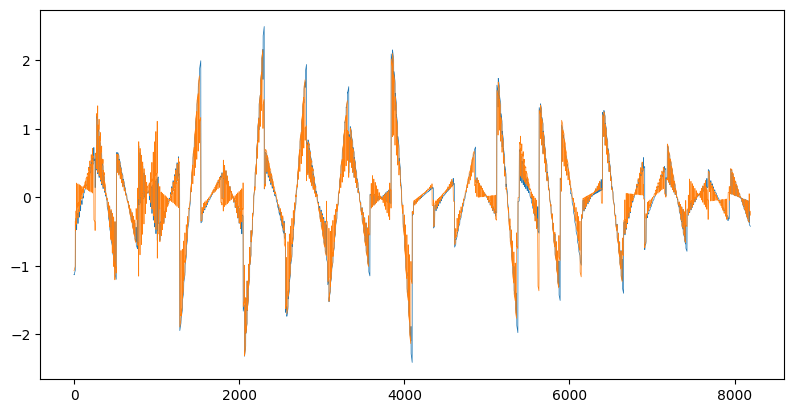

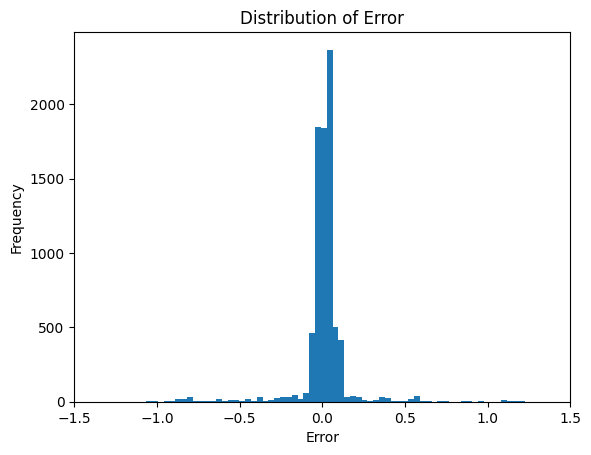

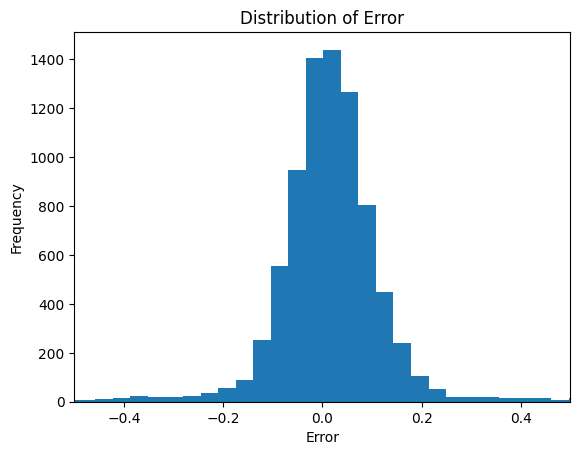

In [ ]:
conv_he = np.loadtxt("data/conv2dfastdownsample1.txt").reshape(-1)

conv_he_ = np.loadtxt("data/conv2dfastdownsample1_.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.layer2[0].conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, 2 * conv_he))

print(precision(conv_o, 2 * conv_he_))

format_ndarray_csv(conv_o[::32], 2 * conv_he[::32], 2 * conv_he_[::32])

plot_error(conv_o, 2 * conv_he)

plt.figure()
plt.hist(2 * conv_he_ - conv_o, bins=100)
plt.xlim((-0.5, 0.5))
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

0.8831490676370893
0.8339289255933146


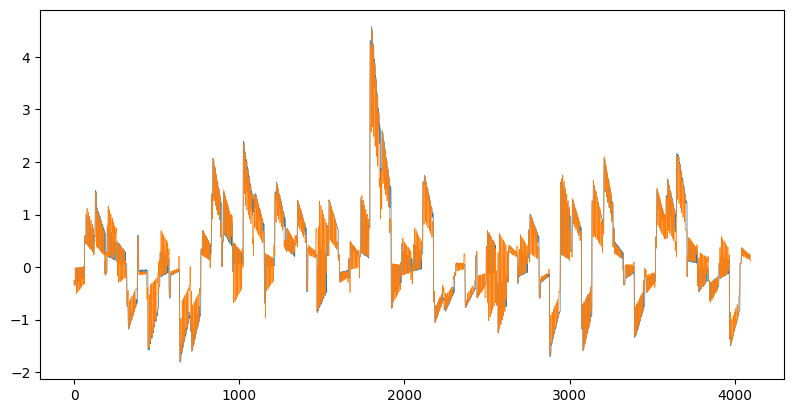

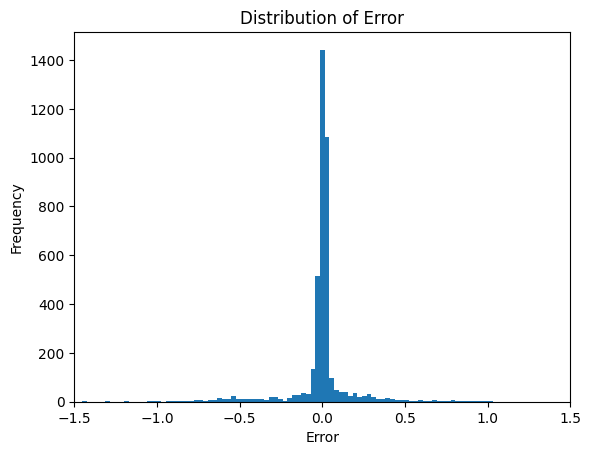

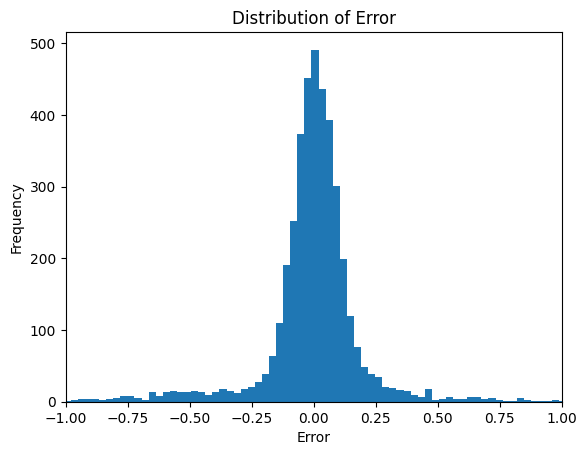

In [85]:
conv_he = np.loadtxt("data/conv2dfastdownsample2.txt").reshape(-1)

conv_he_ = np.loadtxt("data/conv2dfastdownsample2_.txt").reshape(-1)

input_tensor = torch.arange(256, dtype=torch.float32).repeat(32).reshape(1, 32, 16, 16)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.layer3[0].conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, 2 * conv_he))

print(precision(conv_o, 2 * conv_he_))

format_ndarray_csv(conv_o[::16], 2 * conv_he[::16], 2 * conv_he_[::16])

plot_error(conv_o, 2 * conv_he)

plt.figure()
plt.hist(2 * conv_he_ - conv_o, bins=100)
plt.xlim((-1, 1))
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

0.9848530410636667
0.7681001813854597


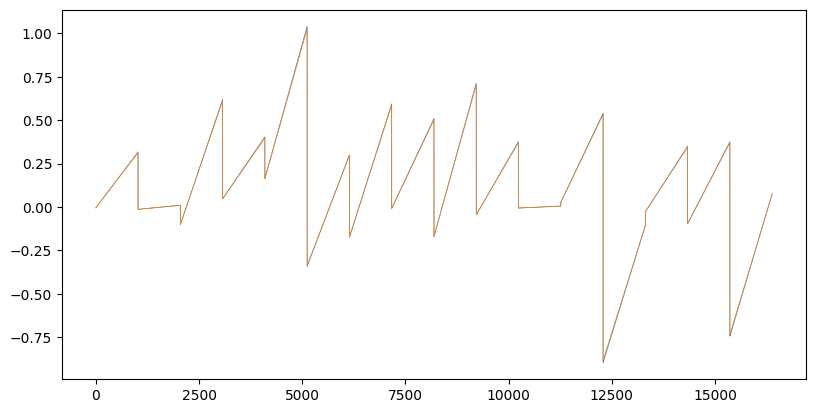

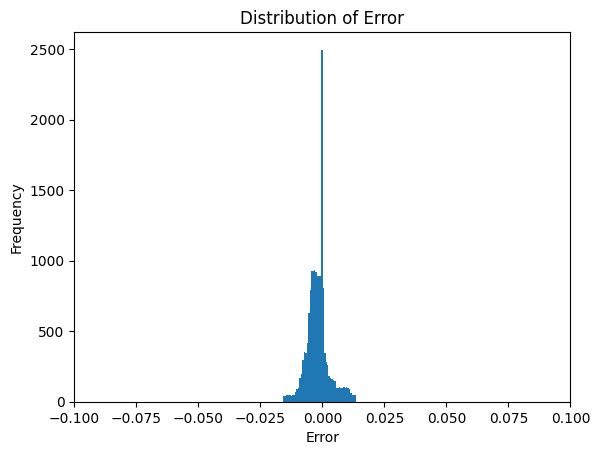

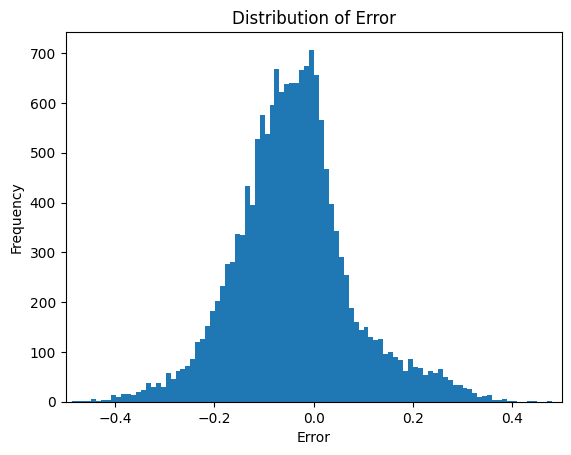

(-0.00200, 30) (-0.00192, 33) (-0.00184, 35) (-0.00176, 34) (-0.00168, 36) (-0.00160, 32) (-0.00152, 35) (-0.00144, 36) (-0.00136, 35) (-0.00128, 34) (-0.00120, 33) (-0.00112, 38) (-0.00104, 33) (-0.00096, 35) (-0.00088, 33) (-0.00080, 37) (-0.00072, 34) (-0.00064, 34) (-0.00056, 36) (-0.00048, 35) (-0.00040, 34) (-0.00032, 35) (-0.00024, 35) (-0.00016, 33) (-0.00008, 35) (0.00000, 35) (0.00008, 36) (0.00016, 34) (0.00024, 33) (0.00032, 37) (0.00040, 34) (0.00048, 36) (0.00056, 32) (0.00064, 36) (0.00072, 34) (0.00080, 36) (0.00088, 32) (0.00096, 36) (0.00104, 36) (0.00112, 34) (0.00120, 34) (0.00128, 36) (0.00136, 34) (0.00144, 34) (0.00152, 35) (0.00160, 34) (0.00168, 37) (0.00176, 31) (0.00184, 34) (0.00192, 39) 
(-0.25, 82) (-0.24, 122) (-0.23, 119) (-0.22, 152) (-0.21, 179) (-0.20, 206) (-0.19, 221) (-0.18, 273) (-0.17, 286) (-0.16, 314) (-0.15, 350) (-0.14, 421) (-0.13, 395) (-0.12, 513) (-0.11, 585) (-0.10, 539) (-0.09, 595) (-0.08, 653) (-0.07, 639) (-0.06, 645) (-0.05, 629) (-

In [107]:
conv_he = np.loadtxt("data/bn.txt").reshape(-1)

conv_he_ = np.loadtxt("data/bn_.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.bn1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he / 0.66))

print(precision(conv_o, conv_he_ / 0.66))

format_ndarray_csv(conv_o[::64], conv_he[::64] / 0.66, conv_he_[::64] / 0.66)

plot_error(conv_o, conv_he / 0.66, (-0.1, 0.1))

plt.figure()
plt.hist(conv_he_ - conv_o, bins=100)
plt.xlim((-0.5, 0.5))
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

hist, bins = np.histogram(conv_he - conv_o, bins=np.linspace(-0.002, 0.002, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.5f}, {hist[i]})", end=" ")

print()

hist, bins = np.histogram(conv_he_ - conv_o, bins=np.linspace(-0.25, 0.25, 51))
for i in range(len(hist)):
    print(f"({bins[i]:.2f}, {hist[i]})", end=" ")

-0.003811011235322903


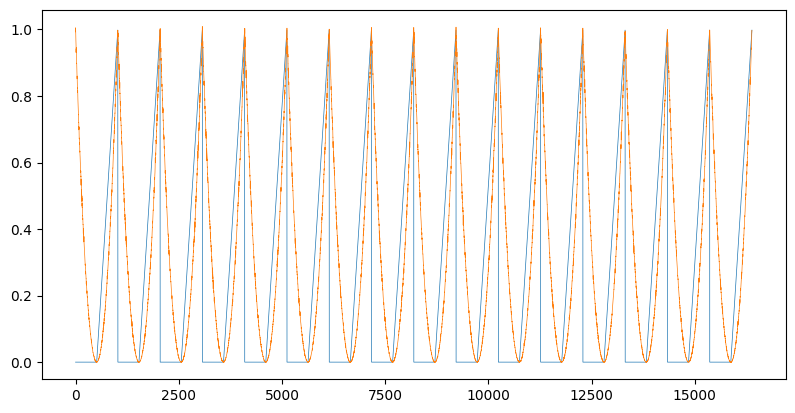

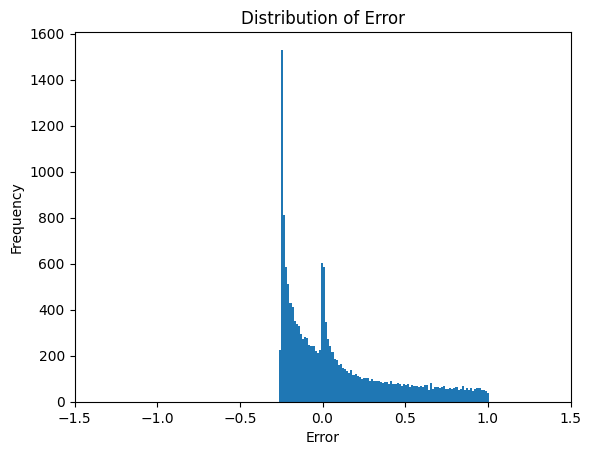

In [11]:
conv_he = np.loadtxt("data/relu.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.relu(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)

0.9470191943887973


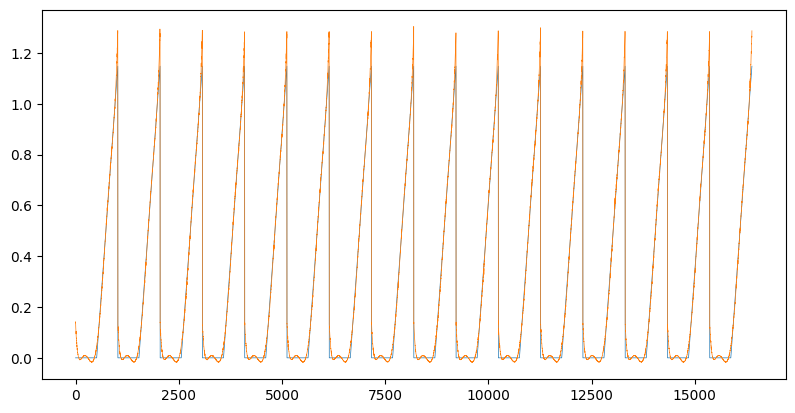

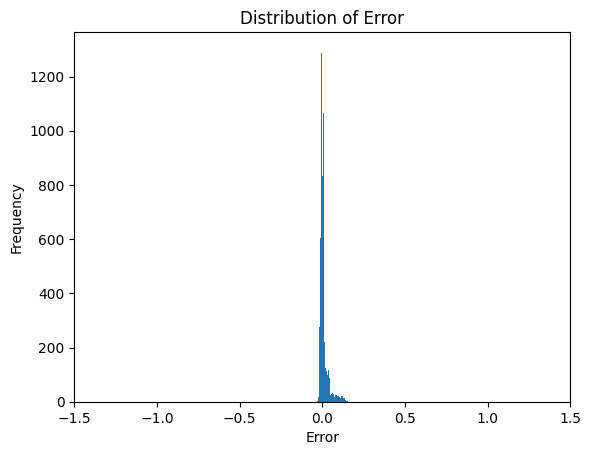

In [12]:
conv_he = np.loadtxt("data/relu1.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2.3

output_tensor = model.relu(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)

0.9571285412555005


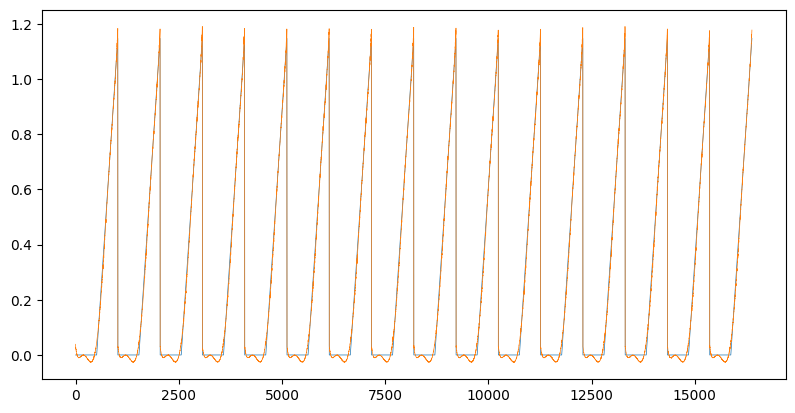

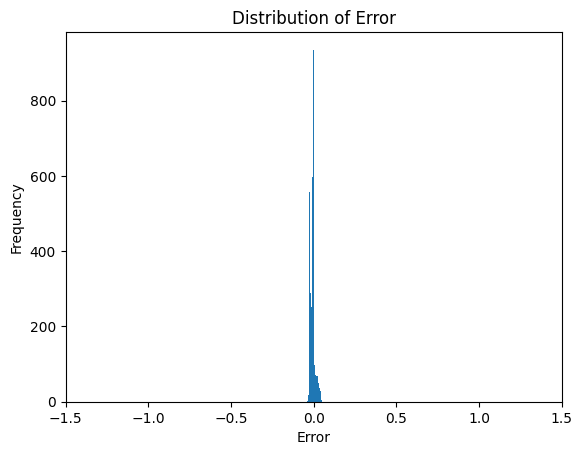

In [11]:
conv_he = np.loadtxt("data/relu2.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2.3

output_tensor = model.relu(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)

0.9998684050939963
0.9957883565797453


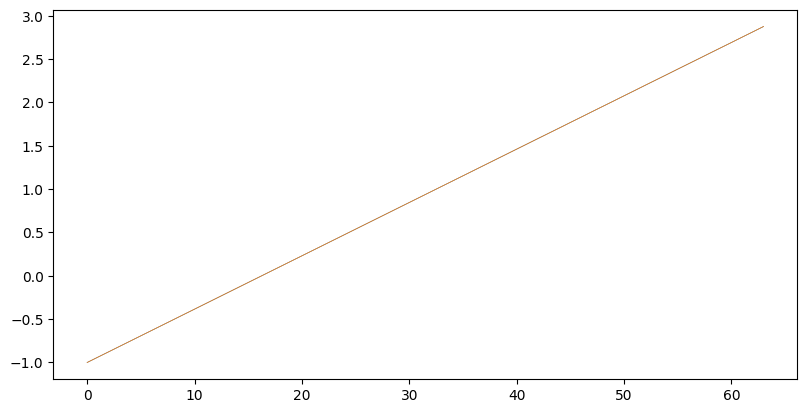

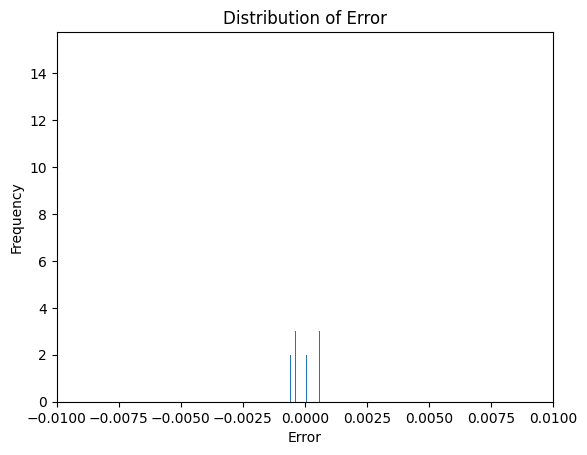

In [59]:
conv_he = np.loadtxt("data/pool.txt").reshape(-1)[0::64] / 64

conv_he_ = np.loadtxt("data/pool_.txt").reshape(-1)[0::64] / 64

input_tensor = torch.arange(64, dtype=torch.float32).repeat(64).reshape(1, 64, 8, 8)

input_tensor *= torch.arange(64, dtype=torch.float32).reshape(1, 64, 1, 1)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.avgpool(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

print(precision(conv_o, conv_he_))

format_ndarray_csv(conv_o, conv_he, conv_he_)

plot_error(conv_o, conv_he, (-0.01, 0.01))

( 0 , -1.0970468 )
( 1 , -0.063769188 )
( 2 , 0.0079645003 )
( 3 , -0.97402499 )
( 4 , 0.52794961 )
( 5 , 0.33777875 )
( 6 , 0.38868635 )
( 7 , 0.41705868 )
( 8 , 0.47094265 )
( 9 , -0.18816592 )
0.9501535373916967
0.5341246835611819


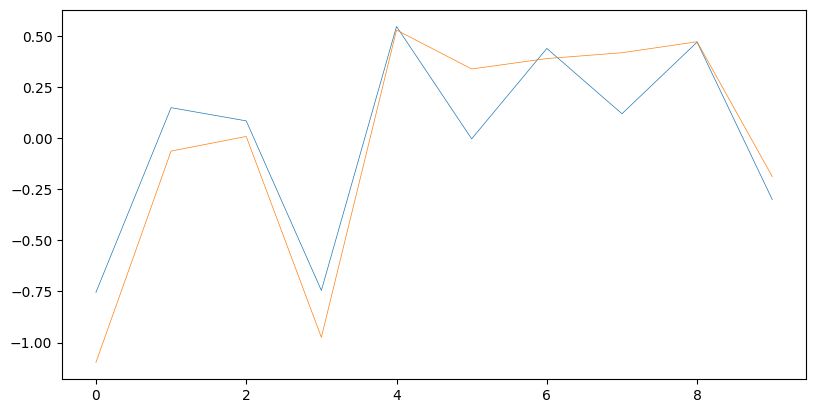

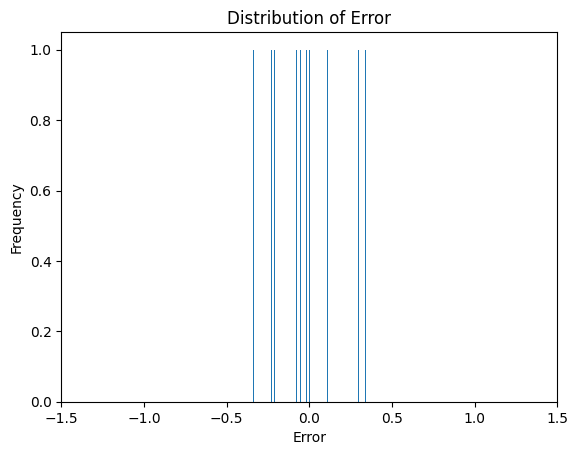

In [71]:
fc = [-0.76289026, 0.14045285, 0.12428657, -0.72846235, 0.55090344, -0.025737393, 0.45435431, 0.099023667, 0.48066967, -0.3322202]

fc_ = [-1.0970468, -0.063769188, 0.0079645003, -0.97402499, 0.52794961, 0.33777875, 0.38868635, 0.41705868, 0.47094265, -0.18816592 ]

input_tensor = torch.arange(64, dtype=torch.float32).repeat(64).reshape(1, 64, 8, 8)

input_tensor *= torch.arange(64, dtype=torch.float32).reshape(1, 64, 1, 1)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

input_tensor = input_tensor[0][:, 0, 0].reshape(64)

# print(input_tensor)

# Assuming the fully connected layer is named 'fc' in the model
weight = model.fc.weight.detach().numpy()

output_tensor = torch.matmul(input_tensor, torch.tensor(weight.T, dtype=torch.float32))

fc_o = output_tensor.reshape(-1).detach().numpy()

for i in range(10):
    print("(", i, ",", fc_[i], ")")

print(precision(fc_o, fc))

print(precision(fc_o, fc_))

plot_error(fc_o, fc_)

In [ ]:
res, res_o = [], []

for i in range(1, 11):
    str0 = "data/pool_" + str(i) + ".txt"

    conv_he_ = np.loadtxt(str0).reshape(-1)[0::64] / 64
    
    res.append(conv_he_)
    
    str1 = "data/input_" + str(i) + ".txt"

    input_tensor = np.loadtxt(str1).repeat(64).reshape(1, 64, 8, 8)

    output_tensor = model.avgpool(input_tensor)

    conv_o = output_tensor.reshape(-1).detach().numpy()
    
    res_o.append(conv_o)

print(precision(res_o, res))

TypeError: 'str' object is not callable